In [978]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')
from matplotlib.pylab import rcParams
plt.style.use('fivethirtyeight')

from fbprophet import Prophet as proph

### Import CSVs

In [979]:
domestic_2019_df = pd.read_csv('T100D_2019_data.csv')

In [980]:
domestic_2019_df.shape

(122975, 19)

In [981]:
domestic_2018_df = pd.read_csv('T100D_2018_data.csv')

In [982]:
domestic_2018_df.shape

(250353, 19)

In [983]:
domestic_2017_df = pd.read_csv('T100D_2017_data.csv')

In [984]:
domestic_2016_df = pd.read_csv('T100D_2016_data.csv')

In [985]:
domestic_2015_df = pd.read_csv('T100D_2015_data.csv')

In [986]:
domestic_2014_df = pd.read_csv('T100D_2014_data.csv')

In [987]:
domestic_2013_df = pd.read_csv('T100D_2013_data.csv')

In [988]:
domestic_2012_df = pd.read_csv('T100D_2012_data.csv')

In [989]:
domestic_2011_df = pd.read_csv('T100D_2011_data.csv')

In [990]:
domestic_2010_df = pd.read_csv('T100D_2010_data.csv')

In [991]:
domestic_df = pd.concat([domestic_2019_df, domestic_2018_df, domestic_2017_df, domestic_2016_df, domestic_2015_df,
                        domestic_2014_df, domestic_2013_df, domestic_2012_df, domestic_2011_df, domestic_2010_df])

In [992]:
domestic_df

,PASSENGERS,DISTANCE,UNIQUE_CARRIER,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_NM,YEAR,MONTH,DISTANCE_GROUP,CLASS,Unnamed: 18
0,0.0,1241.0,0WQ,Avjet Corporation,10423,30423,AUS,"Austin, TX",Texas,10800,32575,BUR,"Burbank, CA",California,2019,1,3,L,NaN
1,0.0,256.0,0WQ,Avjet Corporation,10800,32575,BUR,"Burbank, CA",California,13476,34922,MRY,"Monterey, CA",California,2019,1,1,L,NaN
2,0.0,325.0,0WQ,Avjet Corporation,10800,32575,BUR,"Burbank, CA",California,13796,32457,OAK,"Oakland, CA",California,2019,1,1,L,NaN
3,0.0,46.0,0WQ,Avjet Corporation,10800,32575,BUR,"Burbank, CA",California,14908,32575,SNA,"Santa Ana, CA",California,2019,1,1,L,NaN
4,0.0,100.0,0WQ,Avjet Corporation,12173,32134,HNL,"Honolulu, HI",Hawaii,13830,33830,OGG,"Kahului, HI",Hawaii,2019,1,1,L,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263157,83752.0,403.0,DL,Delta Air Lines Inc.,10397,30397,ATL,"Atlanta, GA",Georgia,13204,31454,MCO,"Orlando, FL",Florida,2010,10,1,F,NaN
263158,84322.0,100.0,HA,Hawaiian Airlines Inc.,12173,32134,HNL,"Honolulu, HI",Hawaii,13830,33830,OGG,"Kahului, HI",Hawaii,2010,7,1,F,NaN
263159,84717.0,100.0,HA,Hawaiian Airlines Inc.,13830,33830,OGG,"Kahului, HI",Hawaii,12173,32134,HNL,"Honolulu, HI",Hawaii,2010,8,1,F,NaN
263160,85216.0,403.0,DL,Delta Air Lines Inc.,10397,30397,ATL,"Atlanta, GA",Georgia,13204,31454,MCO,"Orlando, FL",Florida,2010,3,1,F,NaN


In [993]:
del domestic_df['Unnamed: 18']

The 'CITY_MARKET_ID' column groups airports in different cities that serve the same market, so we'll use that as the main identifier for a destination. Supplementary tables are provided detailing the city market based on code, which we'll include in the table.

In [994]:
domestic_df.set_index('DEST_CITY_MARKET_ID', inplace=True)

In [995]:
#import supplementary table of markets based on city market ID
markets = pd.read_csv('L_CITY_MARKET_ID.csv', index_col='Code')

In [996]:
#join tables for additional column of market 
domestic_df = domestic_df.join(markets, how='left')

In [997]:
domestic_df.isna().sum()

PASSENGERS                 0
DISTANCE                   0
UNIQUE_CARRIER           358
UNIQUE_CARRIER_NAME      171
ORIGIN_AIRPORT_ID          0
ORIGIN_CITY_MARKET_ID      0
ORIGIN                     0
ORIGIN_CITY_NAME           0
ORIGIN_STATE_NM            0
DEST_AIRPORT_ID            0
DEST                       0
DEST_CITY_NAME             0
DEST_STATE_NM              0
YEAR                       0
MONTH                      0
DISTANCE_GROUP             0
CLASS                      0
Description                0
dtype: int64

In [998]:
domestic_df['Day'] = 1

In [999]:
#create Datetime column
domestic_df['ds'] = pd.to_datetime(domestic_df[['YEAR','MONTH', 'Day']])

In [1000]:
domestic_df.set_index('ds', inplace=True)

In [1001]:
domestic_df.head()

,PASSENGERS,DISTANCE,UNIQUE_CARRIER,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_NM,YEAR,MONTH,DISTANCE_GROUP,CLASS,Description,Day
ds,,,,,,,,,,,,,,,,,,,
2019-06-01,6.0,109.0,8E,Bering Air Inc.,13970,33970,OTZ,"Kotzebue, AK",Alaska,11946,GMT,"Granite Mountain, AK",Alaska,2019,6,1,L,"Granite Mountain, AK",1
2014-07-01,3.0,137.0,8E,Bering Air Inc.,13873,33873,OME,"Nome, AK",Alaska,11946,GMT,"Granite Mountain, AK",Alaska,2014,7,1,L,"Granite Mountain, AK",1
2013-08-01,0.0,137.0,8E,Bering Air Inc.,13873,33873,OME,"Nome, AK",Alaska,11946,GMT,"Granite Mountain, AK",Alaska,2013,8,1,L,"Granite Mountain, AK",1
2013-09-01,0.0,147.0,7S,Ryan Air f/k/a Arctic Transportation,13873,33873,OME,"Nome, AK",Alaska,10003,03A,"Granite Mountain, AK",Alaska,2013,9,1,G,"Granite Mountain, AK",1
2013-07-01,3.0,137.0,8E,Bering Air Inc.,13873,33873,OME,"Nome, AK",Alaska,11946,GMT,"Granite Mountain, AK",Alaska,2013,7,1,L,"Granite Mountain, AK",1


In [1002]:
domestic_df = domestic_df[['PASSENGERS', 'Description']]
domestic_df.head()

,PASSENGERS,Description
ds,,
2019-06-01,6.0,"Granite Mountain, AK"
2014-07-01,3.0,"Granite Mountain, AK"
2013-08-01,0.0,"Granite Mountain, AK"
2013-09-01,0.0,"Granite Mountain, AK"
2013-07-01,3.0,"Granite Mountain, AK"


In [1003]:
domestic_df['Description'] = domestic_df['Description'].apply(lambda x: x.split(',')[0])

In [1004]:
domestic_df.head()

,PASSENGERS,Description
ds,,
2019-06-01,6.0,Granite Mountain
2014-07-01,3.0,Granite Mountain
2013-08-01,0.0,Granite Mountain
2013-09-01,0.0,Granite Mountain
2013-07-01,3.0,Granite Mountain


In [1005]:
sums = pd.DataFrame(domestic_df.groupby('Description')['PASSENGERS'].sum())

Find top 25 US cities visited

In [1007]:
top_cities = sums.sort_values('PASSENGERS', ascending=False)
top_25 = list(top_cities[:25].index)
top_25

['Atlanta',
 'New York City',
 'Chicago',
 'Los Angeles',
 'Dallas/Fort Worth',
 'Washington',
 'San Francisco',
 'Denver',
 'Houston',
 'Miami',
 'Phoenix',
 'Las Vegas',
 'Charlotte',
 'Seattle',
 'Orlando',
 'Boston',
 'Minneapolis/St. Paul',
 'Detroit',
 'Philadelphia',
 'Salt Lake City',
 'San Diego',
 'Tampa',
 'Portland',
 'Honolulu',
 'St. Louis']

In [1006]:
cities = list(map(lambda x: x.split('(')[0].split(',')[0].split('/')[0], top_25))

In [588]:
#remove cities not in top 25 from US dataframe
domestic_df = domestic_df[domestic_df['city'].apply(lambda x: x in cities)]

In [589]:
#removing washington, PA because we only want DC
domestic_df = domestic_df[domestic_df['Description'] != 'Washington, PA']

In [590]:
domestic_df.head()

,PASSENGERS,Description,city
ds,,,
2019-01-01,0.0,"Denver, CO",Denver
2019-01-01,0.0,"Denver, CO",Denver
2019-01-01,0.0,"Denver, CO",Denver
2019-01-01,0.0,"Denver, CO",Denver
2019-01-01,0.0,"Denver, CO",Denver


In [591]:
#group by day and destination
domestic_df = pd.DataFrame(domestic_df.groupby([domestic_df.index,'Description', 'city'])['PASSENGERS'].sum().reset_index())

In [592]:
domestic_df

,ds,Description,city,PASSENGERS
0,2010-01-01,"Atlanta, GA (Metropolitan Area)",Atlanta,2735491.0
1,2010-01-01,"Boston, MA (Metropolitan Area)",Boston,1008661.0
2,2010-01-01,"Charlotte, NC",Charlotte,1221593.0
3,2010-01-01,"Chicago, IL",Chicago,2427421.0
4,2010-01-01,"Denver, CO",Denver,1712891.0
...,...,...,...,...
2753,2019-06-01,"San Diego, CA",San Diego,1096977.0
2754,2019-06-01,"San Francisco, CA (Metropolitan Area)",San Francisco,3093385.0
2755,2019-06-01,"Seattle, WA",Seattle,2131899.0
2756,2019-06-01,"Tampa, FL (Metropolitan Area)",Tampa,953755.0


## Import International Data

In [927]:
international_df = pd.read_csv('International_data.csv', header=[1])
international_df

,Region,Hong Kong SAR (China),United Kingdom,Singapore,France,United Arab Emirates,Malaysia,Thailand,India,Japan,Italy,Turkey,Taiwan,Netherlands,South Korea,Spain,Germany,Greece,Croatia,Iceland
0,Jan-10,"1,906,253","4,830,092","1,681,005","4,154,249","1,878,388","2,601,868","749,879","1,499,009",NaN,"2,297,141","513,811","214,118","1,489,035",NaN,"1,672,945",NaN,NaN,"165,000","38,726"
1,Feb-10,"1,903,106","4,600,406","1,499,346","3,821,563","1,803,584","2,531,547","746,204","1,493,435",NaN,"2,190,848","1,056,434","251,329","1,416,049",NaN,"1,828,004",NaN,NaN,"145,000","37,292"
2,Mar-10,"1,996,482","5,211,877","1,674,208","4,654,929","1,930,197","2,802,885","693,866","1,554,893",NaN,"2,791,984","1,904,256","241,466","1,762,140",NaN,"2,287,264",NaN,NaN,"199,000","48,812"
3,Apr-10,"2,066,587","4,446,530","1,617,186","4,062,475","1,815,735","2,648,646","569,080","1,631,005",NaN,"2,912,851","3,007,152","286,677","1,472,647",NaN,"2,229,097",NaN,NaN,"267,000","42,197"
4,May-10,"1,989,423","5,255,772","1,613,748","5,199,610","1,766,404","2,729,223","426,423","1,844,582",NaN,"3,239,359","5,416,059","311,368","2,068,682",NaN,"2,511,974",NaN,NaN,"492,000","51,566"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [928]:
international_df = international_df.rename(columns = {'Region':'ds'})

In [929]:
international_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 20 columns):
ds                       114 non-null object
Hong Kong SAR (China)    114 non-null object
United Kingdom           114 non-null object
Singapore                114 non-null object
France                   114 non-null object
United Arab Emirates     108 non-null object
Malaysia                 114 non-null object
Thailand                 114 non-null object
India                    114 non-null object
Japan                    90 non-null object
Italy                    114 non-null object
Turkey                   114 non-null object
Taiwan                   114 non-null object
Netherlands              114 non-null object
South Korea              65 non-null object
Spain                    114 non-null object
Germany                  102 non-null object
Greece                   81 non-null object
Croatia                  114 non-null object
Iceland                  114 non-null objec

In [930]:
international_df['ds'] = pd.to_datetime(international_df['ds'],format='%b-%y', yearfirst=False)

In [931]:
international_df.head()

,ds,Hong Kong SAR (China),United Kingdom,Singapore,France,United Arab Emirates,Malaysia,Thailand,India,Japan,Italy,Turkey,Taiwan,Netherlands,South Korea,Spain,Germany,Greece,Croatia,Iceland
0,2010-01-01,"1,906,253","4,830,092","1,681,005","4,154,249","1,878,388","2,601,868","749,879","1,499,009",NaN,"2,297,141","513,811","214,118","1,489,035",NaN,"1,672,945",NaN,NaN,"165,000","38,726"
1,2010-02-01,"1,903,106","4,600,406","1,499,346","3,821,563","1,803,584","2,531,547","746,204","1,493,435",NaN,"2,190,848","1,056,434","251,329","1,416,049",NaN,"1,828,004",NaN,NaN,"145,000","37,292"
2,2010-03-01,"1,996,482","5,211,877","1,674,208","4,654,929","1,930,197","2,802,885","693,866","1,554,893",NaN,"2,791,984","1,904,256","241,466","1,762,140",NaN,"2,287,264",NaN,NaN,"199,000","48,812"
3,2010-04-01,"2,066,587","4,446,530","1,617,186","4,062,475","1,815,735","2,648,646","569,080","1,631,005",NaN,"2,912,851","3,007,152","286,677","1,472,647",NaN,"2,229,097",NaN,NaN,"267,000","42,197"
4,2010-05-01,"1,989,423","5,255,772","1,613,748","5,199,610","1,766,404","2,729,223","426,423","1,844,582",NaN,"3,239,359","5,416,059","311,368","2,068,682",NaN,"2,511,974",NaN,NaN,"492,000","51,566"


In [932]:
#impute subsequent value for that month and location to NaNs:
international_df = international_df.fillna(value=None, method='backfill', axis=None, limit=35, downcast=None)

In [933]:
international_df = international_df[international_df.ds < '2019-02-01']

In [934]:
international_df.head()

,ds,Hong Kong SAR (China),United Kingdom,Singapore,France,United Arab Emirates,Malaysia,Thailand,India,Japan,Italy,Turkey,Taiwan,Netherlands,South Korea,Spain,Germany,Greece,Croatia,Iceland
0,2010-01-01,"1,906,253","4,830,092","1,681,005","4,154,249","1,878,388","2,601,868","749,879","1,499,009","4,948,428","2,297,141","513,811","214,118","1,489,035","810,721","1,672,945","489,487","1,104,900","165,000","38,726"
1,2010-02-01,"1,903,106","4,600,406","1,499,346","3,821,563","1,803,584","2,531,547","746,204","1,493,435","4,948,428","2,190,848","1,056,434","251,329","1,416,049","810,721","1,828,004","489,487","1,104,900","145,000","37,292"
2,2010-03-01,"1,996,482","5,211,877","1,674,208","4,654,929","1,930,197","2,802,885","693,866","1,554,893","4,948,428","2,791,984","1,904,256","241,466","1,762,140","810,721","2,287,264","489,487","1,104,900","199,000","48,812"
3,2010-04-01,"2,066,587","4,446,530","1,617,186","4,062,475","1,815,735","2,648,646","569,080","1,631,005","4,948,428","2,912,851","3,007,152","286,677","1,472,647","810,721","2,229,097","489,487","1,104,900","267,000","42,197"
4,2010-05-01,"1,989,423","5,255,772","1,613,748","5,199,610","1,766,404","2,729,223","426,423","1,844,582","4,948,428","3,239,359","5,416,059","311,368","2,068,682","810,721","2,511,974","489,487","1,104,900","492,000","51,566"


In [935]:
#impute following value for that month and location to NaNs:
international_df = international_df.fillna(value=None, method='ffill', axis=None, limit=35, downcast=None)

In [936]:
international_df.isna().sum()

ds                       0
Hong Kong SAR (China)    0
United Kingdom           0
Singapore                0
France                   0
United Arab Emirates     0
Malaysia                 0
Thailand                 0
India                    0
Japan                    0
Italy                    0
Turkey                   0
Taiwan                   0
Netherlands              0
South Korea              0
Spain                    0
Germany                  0
Greece                   0
Croatia                  0
Iceland                  0
dtype: int64

In [937]:
international_df = pd.DataFrame(international_df.set_index('ds').unstack()).reset_index()
international_df

,level_0,ds,0
0,Hong Kong SAR (China),2010-01-01,"1,906,253"
1,Hong Kong SAR (China),2010-02-01,"1,903,106"
2,Hong Kong SAR (China),2010-03-01,"1,996,482"
3,Hong Kong SAR (China),2010-04-01,"2,066,587"
4,Hong Kong SAR (China),2010-05-01,"1,989,423"
...,...,...,...
2066,Iceland,2018-09-01,"265,842"
2067,Iceland,2018-10-01,"263,587"
2068,Iceland,2018-11-01,"184,982"
2069,Iceland,2018-12-01,"186,853"


In [938]:
international_df = international_df.rename(columns = {'level_0': 'Description', 0: 'PASSENGERS'})

In [939]:
international_df.head()

,Description,ds,PASSENGERS
0,Hong Kong SAR (China),2010-01-01,"1,906,253"
1,Hong Kong SAR (China),2010-02-01,"1,903,106"
2,Hong Kong SAR (China),2010-03-01,"1,996,482"
3,Hong Kong SAR (China),2010-04-01,"2,066,587"
4,Hong Kong SAR (China),2010-05-01,"1,989,423"


In [940]:
international_df.loc[international_df['Description'] == 'Hong Kong SAR (China)', 'Description'] = 'Hong Kong'

In [941]:
international_df.loc[international_df['Description'] == 'United Kingdom', 'Description'] = 'London'
international_df.loc[international_df['Description'] == 'France', 'Description'] = 'Paris'
international_df.loc[international_df['Description'] == 'United Arab Emirates', 'Description'] = 'Dubai'
international_df.loc[international_df['Description'] == 'Malaysia', 'Description'] = 'Kuala Lumpur'
international_df.loc[international_df['Description'] == 'Thailand', 'Description'] = 'Phuket'
international_df.loc[international_df['Description'] == 'India', 'Description'] = 'Delhi'
international_df.loc[international_df['Description'] == 'Japan', 'Description'] = 'Tokyo'
international_df.loc[international_df['Description'] == 'Italy', 'Description'] = 'Rome'
international_df.loc[international_df['Description'] == 'Turkey', 'Description'] = 'Antalya'
international_df.loc[international_df['Description'] == 'Taiwan', 'Description'] = 'Taipei'
international_df.loc[international_df['Description'] == 'Netherlands', 'Description'] = 'Amsterdam'
international_df.loc[international_df['Description'] == 'South Korea', 'Description'] = 'Seoul'
international_df.loc[international_df['Description'] == 'Spain', 'Description'] = 'Barcelona'
international_df.loc[international_df['Description'] == 'Germany', 'Description'] = 'Berlin'
international_df.loc[international_df['Description'] == 'Greece', 'Description'] = 'Athens'
international_df.loc[international_df['Description'] == 'Iceland', 'Description'] = 'Reykjavik'

In [942]:
international_df

,Description,ds,PASSENGERS
0,Hong Kong,2010-01-01,"1,906,253"
1,Hong Kong,2010-02-01,"1,903,106"
2,Hong Kong,2010-03-01,"1,996,482"
3,Hong Kong,2010-04-01,"2,066,587"
4,Hong Kong,2010-05-01,"1,989,423"
...,...,...,...
2066,Reykjavik,2018-09-01,"265,842"
2067,Reykjavik,2018-10-01,"263,587"
2068,Reykjavik,2018-11-01,"184,982"
2069,Reykjavik,2018-12-01,"186,853"


In [943]:
combined_df = pd.concat([domestic_df, international_df], sort=False)

In [944]:
combined_df

,Date,Description,PASSENGERS,city,ds
0,NaT,"Atlanta, GA (Metropolitan Area)",2.73549e+06,Atlanta,2010-01-01
1,NaT,"Boston, MA (Metropolitan Area)",1.00866e+06,Boston,2010-01-01
2,NaT,"Charlotte, NC",1.22159e+06,Charlotte,2010-01-01
3,NaT,"Chicago, IL",2.42742e+06,Chicago,2010-01-01
4,NaT,"Denver, CO",1.71289e+06,Denver,2010-01-01
...,...,...,...,...,...
2066,NaT,Reykjavik,"265,842",NaN,2018-09-01
2067,NaT,Reykjavik,"263,587",NaN,2018-10-01
2068,NaT,Reykjavik,"184,982",NaN,2018-11-01
2069,NaT,Reykjavik,"186,853",NaN,2018-12-01


In [945]:
del combined_df['Date']

In [946]:
del combined_df['city']

In [947]:
combined_df

,Description,PASSENGERS,ds
0,"Atlanta, GA (Metropolitan Area)",2.73549e+06,2010-01-01
1,"Boston, MA (Metropolitan Area)",1.00866e+06,2010-01-01
2,"Charlotte, NC",1.22159e+06,2010-01-01
3,"Chicago, IL",2.42742e+06,2010-01-01
4,"Denver, CO",1.71289e+06,2010-01-01
...,...,...,...
2066,Reykjavik,"265,842",2018-09-01
2067,Reykjavik,"263,587",2018-10-01
2068,Reykjavik,"184,982",2018-11-01
2069,Reykjavik,"186,853",2018-12-01


## Get Weather Data

In [650]:
import requests

In [949]:
dom_cities = list(map(lambda x: x.split('(')[0].split(',')[0].split('/')[0], top_25))
for i, city in enumerate(dom_cities):
    dom_cities[i] = city.replace(' ', '_')
    
dom_cities

['Atlanta',
 'New_York_City',
 'Chicago',
 'Los_Angeles',
 'Dallas',
 'Washington',
 'San_Francisco',
 'Denver',
 'Houston',
 'Miami',
 'Phoenix',
 'Las_Vegas',
 'Charlotte',
 'Seattle',
 'Orlando',
 'Boston',
 'Minneapolis',
 'Detroit',
 'Philadelphia',
 'Salt_Lake_City',
 'San_Diego',
 'Tampa',
 'Portland',
 'Honolulu',
 'St._Louis']

In [950]:
int_cities = list(map(lambda x: x.split('(')[0].split(',')[0].split('/')[0], international_df['Description'].unique()))
for i, city in enumerate(int_cities):
    int_cities[i] = city.replace(' ', '_')
    
int_cities

['Hong_Kong',
 'London',
 'Singapore',
 'Paris',
 'Dubai',
 'Kuala_Lumpur',
 'Phuket',
 'Delhi',
 'Tokyo',
 'Rome',
 'Antalya',
 'Taipei',
 'Amsterdam',
 'Seoul',
 'Barcelona',
 'Berlin',
 'Athens',
 'Croatia',
 'Reykjavik']

In [951]:
cities = dom_cities + int_cities

In [918]:
api_key = 'exbuNW5R'

In [952]:
stations = {}
for city in cities:
    try:
        response = requests.get(f'https://api.meteostat.net/v1/stations/search?q={city}&key=exbuNW5R').json()
        station = response['data'][0]['id']
        stations[f'{city}'] = station
    except:
        stations[f'{city}'] = 'Not Available'

In [953]:
stations

{'Atlanta': '72219',
 'New_York_City': 'KNYC0',
 'Chicago': '72530',
 'Los_Angeles': '72295',
 'Dallas': '72259',
 'Washington': '72405',
 'San_Francisco': '72494',
 'Denver': '72565',
 'Houston': '72243',
 'Miami': '72202',
 'Phoenix': '72278',
 'Las_Vegas': '78373',
 'Charlotte': '72314',
 'Seattle': '72793',
 'Orlando': '72205',
 'Boston': '72509',
 'Minneapolis': '72658',
 'Detroit': '72537',
 'Philadelphia': '72408',
 'Salt_Lake_City': '72572',
 'San_Diego': '72290',
 'Tampa': '72211',
 'Portland': '72606',
 'Honolulu': '91182',
 'St._Louis': 'KSUS0',
 'Hong_Kong': '45007',
 'London': '68858',
 'Singapore': '48698',
 'Paris': '07149',
 'Dubai': '41194',
 'Kuala_Lumpur': 'Not Available',
 'Phuket': '48564',
 'Delhi': '42182',
 'Tokyo': '47662',
 'Rome': '87046',
 'Antalya': '17300',
 'Taipei': '46696',
 'Amsterdam': '06240',
 'Seoul': '47110',
 'Barcelona': '08181',
 'Berlin': '10381',
 'Athens': '72311',
 'Croatia': 'Not Available',
 'Reykjavik': '04030'}

In [948]:
requests.get(f'https://api.meteostat.net/v1/stations/search?q=st_louis&key=exbuNW5R').json()

{'meta': {},
 'data': [{'id': '72434',
   'country': 'US',
   'name': 'Lambert-St Louis International  Airport'},
  {'id': 'KSUS0', 'country': 'US', 'name': 'St Louis / St. Louis / Stevens'}]}

In [954]:
stations['New_York_City'] = 72503
stations['St._Louis'] = 72434
stations['Washington'] = 72406
stations['Kuala_Lumpur'] = 48665
stations['Taipei'] = 46756
stations['Croatia'] = 14474

In [955]:
stations

{'Atlanta': '72219',
 'New_York_City': 72503,
 'Chicago': '72530',
 'Los_Angeles': '72295',
 'Dallas': '72259',
 'Washington': 72406,
 'San_Francisco': '72494',
 'Denver': '72565',
 'Houston': '72243',
 'Miami': '72202',
 'Phoenix': '72278',
 'Las_Vegas': '78373',
 'Charlotte': '72314',
 'Seattle': '72793',
 'Orlando': '72205',
 'Boston': '72509',
 'Minneapolis': '72658',
 'Detroit': '72537',
 'Philadelphia': '72408',
 'Salt_Lake_City': '72572',
 'San_Diego': '72290',
 'Tampa': '72211',
 'Portland': '72606',
 'Honolulu': '91182',
 'St._Louis': 72434,
 'Hong_Kong': '45007',
 'London': '68858',
 'Singapore': '48698',
 'Paris': '07149',
 'Dubai': '41194',
 'Kuala_Lumpur': 48665,
 'Phuket': '48564',
 'Delhi': '42182',
 'Tokyo': '47662',
 'Rome': '87046',
 'Antalya': '17300',
 'Taipei': 46756,
 'Amsterdam': '06240',
 'Seoul': '47110',
 'Barcelona': '08181',
 'Berlin': '10381',
 'Athens': '72311',
 'Croatia': 14474,
 'Reykjavik': '04030'}

In [959]:
def get_weather_data(stations):
    city_weather_history = []
    city = {}

    for i, v in stations.items():
        response = requests.get(f'https://api.meteostat.net/v1/history/monthly?station={v}&start=2009-01&end=2019-01&key=exbuNW5R').json() 
        for m in response['data']:
            try:
                month = {}
                month['city_name'] = i
                month['month'] = m['month']
                month['temperature_mean'] = m['temperature_mean']
                month['precipitation'] = m['precipitation']
                month['rain_days'] = m['raindays']
                month['pressure'] = m['pressure']

                city_weather_history.append(month) 
#                 print(f"Retrieved {i}'s weather data")
            except:
                month['city_name'] = i
                month['month'] = 0
                month['temperature_mean'] = 0
                month['precipitation'] = 0
                month['rain_days'] = 0
                month['pressure'] = 0
                city_weather_history.append(month) 
#                 print(f"Could not retrieve {i}'s weather data")
    
    return city_weather_history

In [960]:
weather_data = pd.DataFrame(get_weather_data(stations))

In [961]:
weather_data

,city_name,month,temperature_mean,precipitation,rain_days,pressure
0,Atlanta,2009-01,6.5,73.0,10.0,1019.6
1,Atlanta,2009-02,8.6,94.0,4.0,1022.3
2,Atlanta,2009-03,12.8,181.0,8.0,1020.4
3,Atlanta,2009-04,15.9,132.0,9.0,1016.8
4,Atlanta,2009-05,21.2,115.0,14.0,1016.8
...,...,...,...,...,...,...
4460,Reykjavik,2018-09,7.1,75.0,15.0,1004.6
4461,Reykjavik,2018-10,3.9,114.0,21.0,998.5
4462,Reykjavik,2018-11,4.2,107.0,9.0,1002.3
4463,Reykjavik,2018-12,2.7,82.0,16.0,998.5


In [962]:
weather_data['city_name'] = weather_data['city_name'].apply(lambda x: x.replace('_', ' '))

In [963]:
#create Datetime column
weather_data['Year'] = weather_data.month.apply(lambda x: x.split('-')[0])
weather_data['Month'] = weather_data.month.apply(lambda x: x.split('-')[1])
weather_data['Day'] = 1
weather_data['month'] = pd.to_datetime(weather_data[['Year','Month', 'Day']])

In [966]:
weather_data.isna().sum()

city_name             0
month                 0
temperature_mean      3
precipitation         0
rain_days            32
pressure            293
Year                  0
Month                 0
Day                   0
dtype: int64

In [973]:
#impute mean temperature for that month and location to NaNs:
weather_data['temperature_mean'] = weather_data.groupby(['city_name', 'Month'])['temperature_mean'].transform(lambda x: x.fillna(x.mean()))

In [967]:
#impute mean precipitation for that month and location to NaNs:
weather_data['precipitation'] = weather_data.groupby(['city_name', 'Month'])['precipitation'].transform(lambda x: x.fillna(x.mean()))

In [968]:
#impute mean rain_days for that month and location to NaNs:
weather_data['rain_days'] = weather_data.groupby(['city_name', 'Month'])['rain_days'].transform(lambda x: x.fillna(x.mean()))

In [969]:
#impute mean pressure for that month and location to NaNs:
weather_data['pressure'] = weather_data.groupby(['city_name', 'Month'])['pressure'].transform(lambda x: x.fillna(x.mean()))

In [975]:
#impute mean pressure of dataset to NaNs where not available:
weather_data['pressure'] = weather_data['pressure'].transform(lambda x: x.fillna(x.mean()))

In [976]:
weather_data.isna().sum()

city_name           0
month               0
temperature_mean    0
precipitation       0
rain_days           0
pressure            0
Year                0
Month               0
Day                 0
dtype: int64

### Merge domestic df and weather

In [977]:
final_df = combined_df.merge(weather_data, how='left', left_on = ['ds', 'city'], right_on = ['month', 'city_name'])

KeyError: 'city'

In [691]:
final_df = final_df[final_df['ds'] < '2019-02-01']

In [695]:
final_df

,ds,Description,city,PASSENGERS,city_name,month,temperature_mean,precipitation,rain_days,pressure,Year,Month,Day
0,2010-01-01,"Atlanta, GA (Metropolitan Area)",Atlanta,2735491.0,Atlanta,2010-01-01,3.6,137.0,7.0,1019.5,2010,01,1.0
1,2010-01-01,"Boston, MA (Metropolitan Area)",Boston,1008661.0,Boston,2010-01-01,-1.3,60.0,5.0,1012.0,2010,01,1.0
2,2010-01-01,"Charlotte, NC",Charlotte,1221593.0,Charlotte,2010-01-01,3.1,124.0,7.0,1018.3,2010,01,1.0
3,2010-01-01,"Chicago, IL",Chicago,2427421.0,Chicago,2010-01-01,-5.5,29.0,4.0,1020.0,2010,01,1.0
4,2010-01-01,"Denver, CO",Denver,1712891.0,Denver,2010-01-01,-0.9,2.0,1.0,1016.5,2010,01,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,2019-01-01,"San Diego, CA",San Diego,863398.0,San Diego,2019-01-01,14.8,71.0,9.0,1019.5,2019,01,1.0
2633,2019-01-01,"San Francisco, CA (Metropolitan Area)",San Francisco,2462163.0,San Francisco,2019-01-01,12.7,117.0,8.0,1018.2,2019,01,1.0
2634,2019-01-01,"Seattle, WA",Seattle,1525148.0,Seattle,2019-01-01,7.2,97.0,14.0,1017.9,2019,01,1.0
2635,2019-01-01,"Tampa, FL (Metropolitan Area)",Tampa,902414.0,Tampa,2019-01-01,16.1,107.0,5.0,1020.5,2019,01,1.0


In [704]:
final_df.isna()

,ds,Description,city,PASSENGERS,city_name,month,temperature_mean,precipitation,rain_days,pressure,Year,Month,Day
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,False,False,False,False,False,False,False,False,False,False,False,False,False
2633,False,False,False,False,False,False,False,False,False,False,False,False,False
2634,False,False,False,False,False,False,False,False,False,False,False,False,False
2635,False,False,False,False,False,False,False,False,False,False,False,False,False


In [701]:
nas = final_df[final_df.isnull()]
nas

,ds,Description,city,PASSENGERS,city_name,month,temperature_mean,precipitation,rain_days,pressure,Year,Month,Day
0,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2633,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2634,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2635,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [269]:
#create dataframe of just NYC to test baseline model

nyc = domestic_df[domestic_df['Description'] == 'New York City, NY (Metropolitan Area)']
nyc = pd.DataFrame(nyc['PASSENGERS'])
nyc = nyc.rename(columns={'PASSENGERS': 'y'})
nyc = pd.DataFrame(nyc.groupby(nyc.index)['y'].sum())

# nyc

Text(0.5, 1.0, 'NYC')

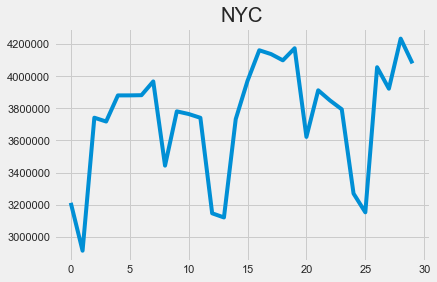

In [270]:
nyc.reset_index(inplace=True)
plt.plot(nyc.index, nyc['y'])
plt.title('NYC')

In [287]:
chicago = domestic_df[domestic_df['Description'] == 'Chicago, IL']
chicago = pd.DataFrame(chicago['PASSENGERS'])
chicago = chicago.rename(columns={'PASSENGERS': 'y'})
chicago = pd.DataFrame(chicago.groupby(chicago.index)['y'].sum())

# chicago

Text(0.5, 1.0, 'Chicago')

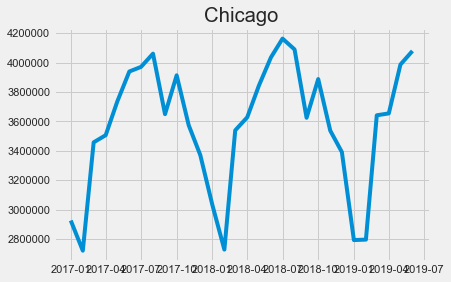

In [288]:
plt.plot(chicago.index, chicago['y'])
plt.title('Chicago')

In [289]:
LA = domestic_df[domestic_df['Description'] == 'Los Angeles, CA (Metropolitan Area)']
LA = pd.DataFrame(LA['PASSENGERS'])
LA = LA.rename(columns={'PASSENGERS': 'y'})
LA = pd.DataFrame(LA.groupby(LA.index)['y'].sum())

# LA

Text(0.5, 1.0, 'Los Angeles')

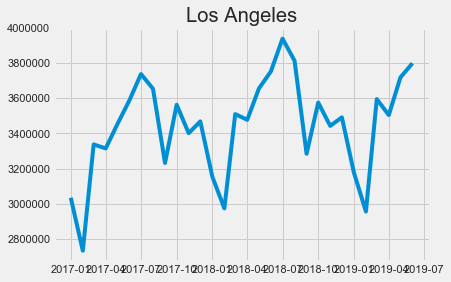

In [290]:
plt.plot(LA.index, LA['y'])
plt.title('Los Angeles')

In [291]:
Kansas = domestic_df[domestic_df['Description'] == 'Topeka, KS']
Kansas = pd.DataFrame(Kansas['PASSENGERS'])
Kansas = Kansas.rename(columns={'PASSENGERS': 'y'})
Kansas = pd.DataFrame(Kansas.groupby(Kansas.index)['y'].sum())


Text(0.5, 1.0, 'Kansas')

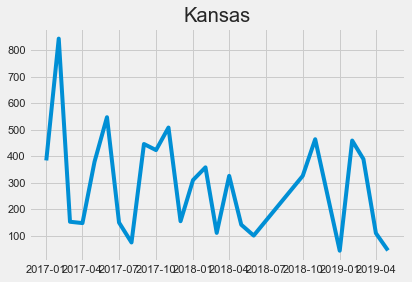

In [292]:
plt.plot(Kansas.index, Kansas['y'])
plt.title('Kansas')

## Run Prophet model

In [256]:
Model = proph(interval_width=0.95)

In [254]:
#split into train and test data
train = pd.DataFrame(nyc['y'].iloc[:-7])
#test on 2019 data
test = pd.DataFrame(nyc['y'].iloc[-7:])

In [257]:
Model.fit(train)

ValueError: Dataframe must have columns 'ds' and 'y' with the dates and values respectively.

## Data Exploration

[Text(0, 0, 'Atlanta, GA (Metropolitan Area)'),
 Text(0, 0, 'New York City, NY (Metropolitan Area)'),
 Text(0, 0, 'Chicago, IL'),
 Text(0, 0, 'Los Angeles, CA (Metropolitan Area)'),
 Text(0, 0, 'Dallas/Fort Worth, TX'),
 Text(0, 0, 'San Francisco, CA (Metropolitan Area)'),
 Text(0, 0, 'Washington, DC (Metropolitan Area)'),
 Text(0, 0, 'Denver, CO'),
 Text(0, 0, 'Miami, FL (Metropolitan Area)'),
 Text(0, 0, 'Houston, TX')]

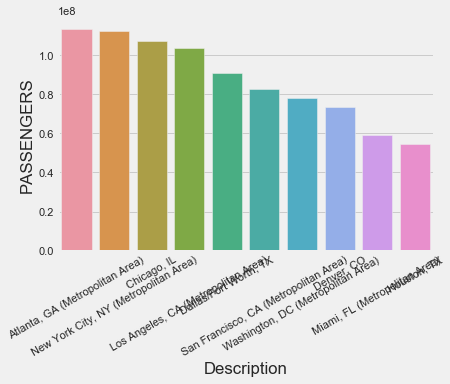

In [296]:
top_10 = sns.barplot(x=top_cities[:10].index, y=top_cities[:10]['PASSENGERS'], data=top_cities[:10])
top_10.set_xticklabels(labels = top_cities[:10].index, rotation=30)

In [80]:
monthly = pd.DataFrame(domestic_df.groupby('MONTH')['PASSENGERS'].sum())

In [81]:
monthly

,PASSENGERS
MONTH,
1,58171360.0
2,55797473.0
3,70382980.0
4,67071221.0
5,71489988.0
6,72897670.0


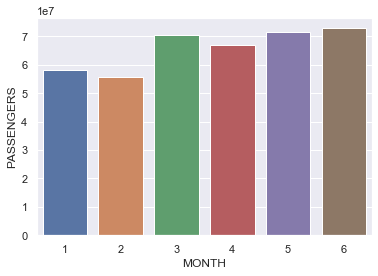

In [83]:
sns.barplot(x=monthly.index, y=monthly['PASSENGERS'], data=monthly)